## Loading Data


In [ ]:
from google.colab import drive  # Import the necessary module for mounting Google Drive
drive.mount('/content/drive')  # Mount Google Drive to the specified directory '/content/drive'

Mounted at /content/drive


In [ ]:
# Load the autoreload extension
%load_ext autoreload
# Set autoreload mode to 2
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [ ]:
# Define the file paths for the train, test, and validation datasets
train_path = '/content/drive/MyDrive/Deep learning Final Project Notebooks/data/train.tsv'
test_path = '/content/drive/MyDrive/Deep learning Final Project Notebooks/data/test.tsv'
val_path = '/content/drive/MyDrive/Deep learning Final Project Notebooks/data/valid.tsv'

# Read the train dataset using pandas
train_df = pd.read_csv(train_path, sep="\t", header=None)

# Read the test dataset using pandas
test_df = pd.read_csv(test_path, sep="\t", header=None)

# Read the validation dataset using pandas
val_df = pd.read_csv(val_path, sep="\t", header=None)


In [ ]:
display(train_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [ ]:
display(test_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,7334.json,half-true,Says his budget provides the highest state fun...,education,rick-scott,Governor,Florida,republican,28,23,38,34,7,a news conference
1263,9788.json,barely-true,Ive been here almost every day.,"civil-rights,crime,criminal-justice",jay-nixon,Governor,Missouri,democrat,2,0,0,1,0,"on ABC's ""This Week"""
1264,10710.json,barely-true,"In the early 1980s, Sen. Edward Kennedy secret...","bipartisanship,congress,foreign-policy,history",mackubin-thomas-owens,"senior fellow, Foreign Policy Research Institute",Rhode Island,columnist,1,0,0,0,0,a commentary in The Providence Journal
1265,3186.json,barely-true,Says an EPA permit languished under Strickland...,"environment,government-efficiency",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9,8,10,18,3,a news conference


In [ ]:
display(val_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News
1,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
2,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
3,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
4,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,3419.json,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70,71,160,163,9,a press conference
1280,12548.json,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40,29,69,76,7,a speech on the economy
1281,401.json,true,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,NaN,"Washington, D.C.",none,0,1,0,2,0,a television ad
1282,1055.json,false,A new poll shows 62 percent support the presid...,health-care,americans-united-change,NaN,NaN,none,1,4,4,1,0,an Internet ad.


## Data Preprocessing

In [ ]:
def data_cleaning(dataset):
    # Dropping unwanted columns
    dataset = dataset.drop(labels=[0, 8, 9, 10, 11, 12], axis=1)
    
    # Renaming column 2 as 'title'
    dataset["title"] = dataset[2]
    
    # Dropping metadata columns, as they have been merged into a single column
    dataset = dataset.drop([2, 3, 4, 5, 6, 7, 13], axis=1)
    
    # Dropping rows with null values
    dataset.dropna()
    
    # Creating a new column called 'label' with 1 for 'true' and 'mostly-true' values, else 0 (1=real, 0=fake)
    dataset['label'] = [1 if x == "true" or x == "mostly-true" else 0 for x in dataset[1]]
    
    # Dropping the original label column
    dataset = dataset.drop(labels=[1], axis=1)
    
    return dataset


In [ ]:
train_df = data_cleaning(train_df)
test_df = data_cleaning(test_df)
val_df = data_cleaning(val_df)

In [ ]:
display(train_df)

,title,label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,0
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,0
...,...,...
10235,There are a larger number of shark attacks in ...,1
10236,Democrats have now become the party of the [At...,1
10237,Says an alternative to Social Security that op...,0
10238,On lifting the U.S. Cuban embargo and allowing...,0


In [ ]:
display(test_df)

,title,label
0,Building a wall on the U.S.-Mexico border will...,1
1,Wisconsin is on pace to double the number of l...,0
2,Says John McCain has done nothing to help the ...,0
3,Suzanne Bonamici supports a plan that will cut...,0
4,When asked by a reporter whether hes at the ce...,0
...,...,...
1262,Says his budget provides the highest state fun...,0
1263,Ive been here almost every day.,0
1264,"In the early 1980s, Sen. Edward Kennedy secret...",0
1265,Says an EPA permit languished under Strickland...,0


In [ ]:
display(val_df)

,title,label
0,We have less Americans working now than in the...,0
1,"When Obama was sworn into office, he DID NOT u...",0
2,Says Having organizations parading as being so...,0
3,Says nearly half of Oregons children are poor.,0
4,On attacks by Republicans that various program...,0
...,...,...
1279,"For the first time in more than a decade, impo...",0
1280,Says Donald Trump has bankrupted his companies...,1
1281,"John McCain and George Bush have ""absolutely n...",1
1282,A new poll shows 62 percent support the presid...,0


In [ ]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Resetting the index of train_df, val_df, and test_df after dropping rows
# The drop=True parameter ensures that the old index is not added as a new column

print('trainset size:', train_df.shape)  # Print the size of the trainset (number of rows and columns)
print('valset size:', val_df.shape)  # Print the size of the valset (number of rows and columns)
print('testset size:', test_df.shape)  # Print the size of the testset (number of rows and columns)


trainset size: (10240, 2)
valset size: (1284, 2)
testset size: (1267, 2)


In [ ]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

In [ ]:
df = pd.concat([train_df, val_df, test_df])
display(df)

,title,label
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,0
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,0
...,...,...
1262,Says his budget provides the highest state fun...,0
1263,Ive been here almost every day.,0
1264,"In the early 1980s, Sen. Edward Kennedy secret...",0
1265,Says an EPA permit languished under Strickland...,0


### Removing stopwords

In [ ]:
import nltk
# Download stopwords from NLTK
nltk.download("stopwords")

# Import stopwords from NLTK corpus
from nltk.corpus import stopwords

# Get the list of English stopwords
stop_words = stopwords.words('english')

# Add additional stopwords to the list
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
      # Check if the token is not a stopword, has a length greater than 3, and is not in the additional stop_words
      if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
        result.append(token)
    return result

In [ ]:
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['title'].apply(preprocess)

In [ ]:
list_of_words = []  # Initialize an empty list to store individual words
for i in df.clean:  # Iterate over each entry in the 'clean' column of the DataFrame
    for j in i:  # Iterate over each word in the entry
        list_of_words.append(j)  # Append the word to the list_of_words

total_words = len(list(set(list_of_words)))  # Count the total number of unique words
display(total_words)  # Display the total number of unique words

11977

In [ ]:
from nltk import word_tokenize

### using tokenizer to create Tokens

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Creating a Tokenizer object
tokenizer = Tokenizer(num_words=total_words)

# Fitting the Tokenizer on the 'title' column of the train_df
tokenizer.fit_on_texts(train_df['title'])

# Converting the 'title' column of train_df, val_df, and test_df into sequences of tokenized words
train_sequences = tokenizer.texts_to_sequences(train_df['title'])
val_sequences = tokenizer.texts_to_sequences(val_df['title'])
test_sequences = tokenizer.texts_to_sequences(test_df['title'])


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding to train_sequences
padded_train = pad_sequences(train_sequences, maxlen=20, padding='post', truncating='post')

# Adding Padding to val_sequences
padded_val = pad_sequences(val_sequences, maxlen=20, padding='post', truncating='post')

# Adding Padding to test_sequences
padded_test = pad_sequences(test_sequences, maxlen=20, padding='post', truncating='post')


# **BERT**

In [ ]:
!pip install transformers

import torch
from transformers import BertTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 112.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.2 MB/s eta 0:00:00


### Processing Data for BERT model

In [ ]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer
    
    def __getitem__(self, idx):
        # Get the statement and label from the dataframe
        statement, label = self.df.iloc[idx, :].values
        
        # Convert the label to a tensor
        label_tensor = torch.tensor(label)
        
        # Tokenize the statement
        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)

        # Convert the tokens to token IDs
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        # Create segments tensor with all 0s
        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
      
    def __len__(self):
        return self.len
    
# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:', trainset.__len__())
print('testset size:', testset.__len__())


trainset size: 10240
testset size: 1267


In [ ]:
display(trainset.df["title"])
display(trainset.df["label"])

0        Says the Annies List political group supports ...
1        When did the decline of coal start? It started...
2        Hillary Clinton agrees with John McCain "by vo...
3        Health care reform legislation is likely to ma...
4        The economic turnaround started at the end of ...
                               ...                        
10235    There are a larger number of shark attacks in ...
10236    Democrats have now become the party of the [At...
10237    Says an alternative to Social Security that op...
10238    On lifting the U.S. Cuban embargo and allowing...
10239    The Department of Veterans Affairs has a manua...
Name: title, Length: 10240, dtype: object

0        0
1        0
2        1
3        0
4        0
        ..
10235    1
10236    1
10237    0
10238    0
10239    0
Name: label, Length: 10240, dtype: int64

In [ ]:
titles = trainset.df["title"]
labels = trainset.df["label"]


In [ ]:
from sklearn.model_selection import train_test_split

#Split data into training and testing dataset
#We teach our model based on the training set (including the labels)
#We take the labels away to test our model with the testing set

x_train, x_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2, random_state=1000)

In [ ]:
!pip install tensorflow-text
import tensorflow_hub as hub
import tensorflow_text as text


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 58.4 MB/s eta 0:00:00


### Creating BERT Model

In [ ]:
import tensorflow as tf

# Check if GPU is available and set the device accordingly
if tf.test.gpu_device_name():
    device = tf.device('/GPU:0')
    print('Using GPU')
else:
    device = tf.device('/CPU:0')
    print('Using CPU')

with device:
    # Use the BERT preprocesser and BERT encoder from TensorFlow Hub
    bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
    bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

    # Define the input layer
    input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='news')

    # Preprocess the input using the BERT preprocesser
    processed = bert_preprocess(input_layer)

    # Encode the preprocessed input using the BERT encoder
    output = bert_encoder(processed)

    # Apply dropout to the pooled output from BERT
    layer = tf.keras.layers.Dropout(0.2, name='dropout')(output['pooled_output'])

    # Add a fully connected layer with 2000 neurons and ReLU activation
    layer = tf.keras.layers.Dense(2000, activation='relu', name='hidden')(layer)
    layer = tf.keras.layers.ReLU()(layer)

    # Add another fully connected layer with 2500 neurons and ReLU activation
    layer = tf.keras.layers.Dense(2500, activation='relu', name='hidden2')(layer)

    # Apply ReLU activation to the layer
    layer = tf.keras.layers.ReLU()(layer)

    # Add the output layer with sigmoid activation for binary classification
    layer = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(layer)

    # Create the model with input and output layers
    model = tf.keras.Model(inputs=[input_layer], outputs=[layer])


Using GPU


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 news (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['news[0][0]']                   
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

### Training the model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 5
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(epochs):
    # Train model for one epoch
    history = model.fit(x_train, y_train, epochs=1, verbose=1)
    
    # Get train loss and accuracy
    train_loss.append(history.history['loss'][0])
    train_accuracy.append(history.history['accuracy'][0])
    
    # Evaluate model on test data
    loss, accuracy = model.evaluate(x_test, y_test)
    test_loss.append(loss)
    test_accuracy.append(accuracy)

64/64 [==============================] - 24s 381ms/step - loss: 0.6445 - accuracy: 0.6372


### Displaying Network architecture

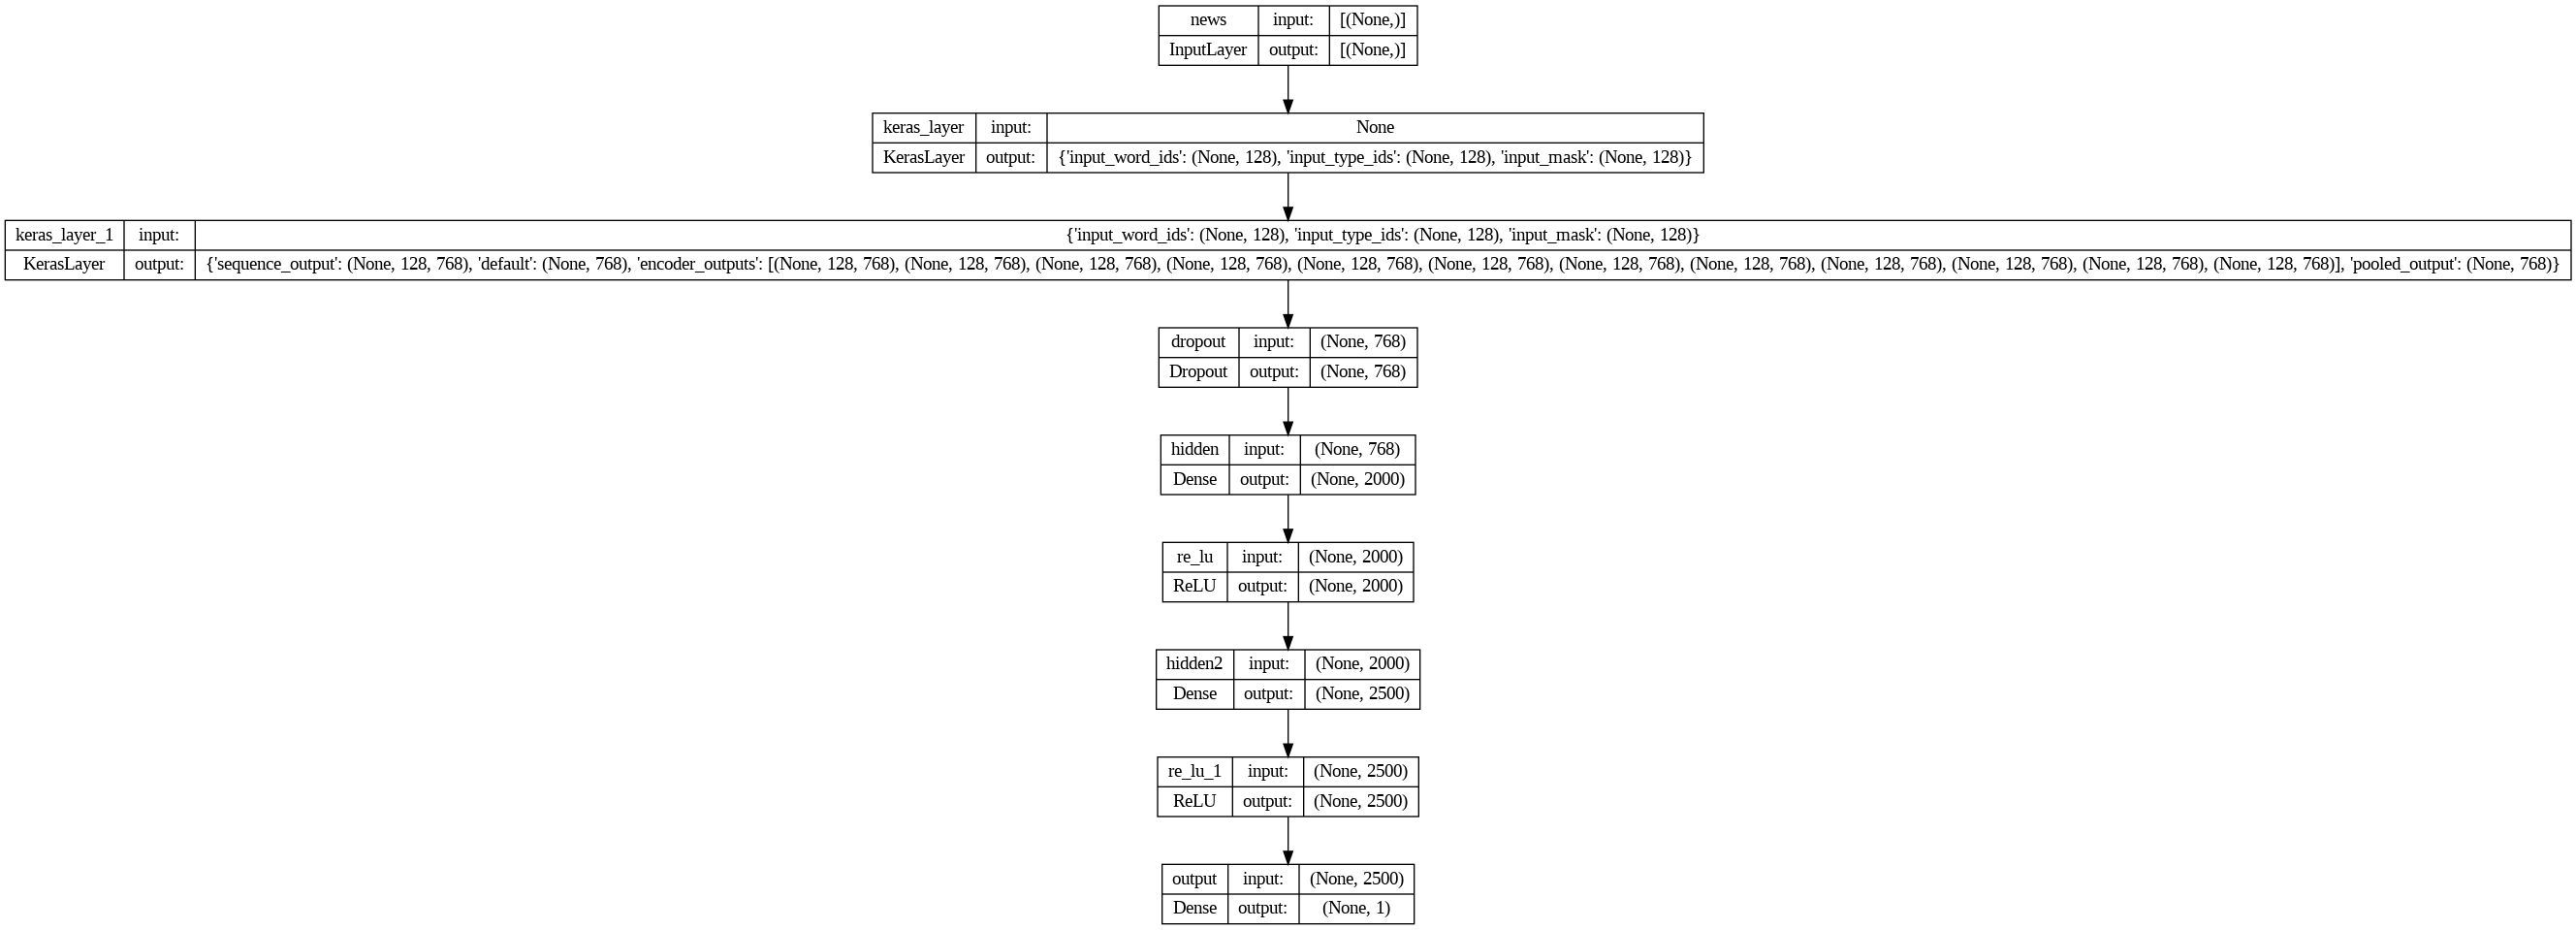

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_bert.png', show_shapes=True, show_layer_names=True)

### Plotting confusion matrix, and Accuracy

64/64 [==============================] - 24s 367ms/step
[[0.         0.36279297]
 [0.         0.63720703]]
Acc: 0.63720703125
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1305
           1       0.00      0.00      0.00       743

    accuracy                           0.64      2048
   macro avg       0.32      0.50      0.39      2048
weighted avg       0.41      0.64      0.50      2048



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


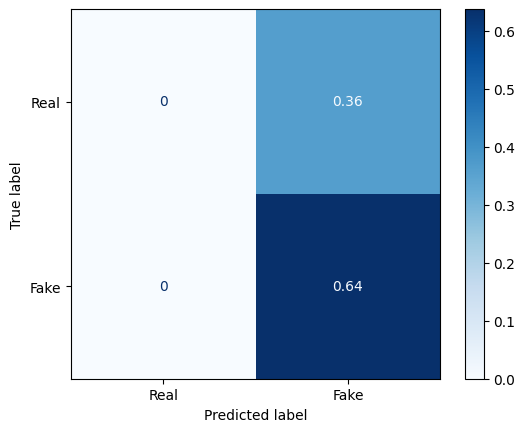

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Get predictions from the model
predictions = model.predict(x_test)

# Convert predictions to binary values
binary_predictions = (predictions > 0.5).astype(int)

# Calculate the confusion matrix
# The labels argument specifies the order of the classes in the matrix
# The normalize argument is set to 'pred' to normalize the matrix by the predicted column
cm = confusion_matrix(y_test, binary_predictions, labels=[1, 0], normalize='pred')
print(cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap=plt.cm.Blues)

# Calculate the accuracy
accuracy = accuracy_score(binary_predictions, y_test)
print('Acc:', accuracy)

# Generate the classification report
report = classification_report(y_test, binary_predictions)
print(report)


### Accuracy

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(binary_predictions, y_test)
print('Accuracy Achieved:', accuracy)

Accuracy Achieved: 0.63720703125


### Plotting train vs test loss and train and test accuracy

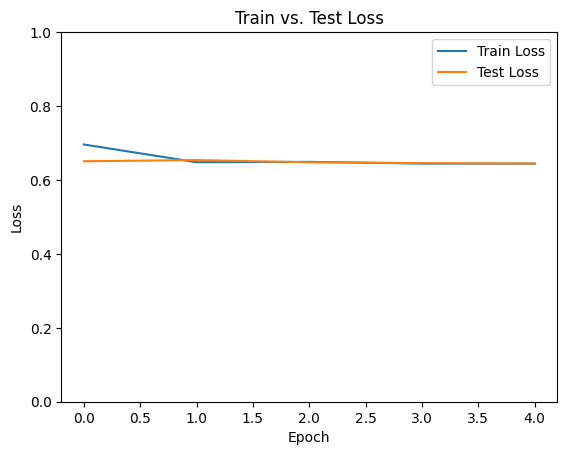

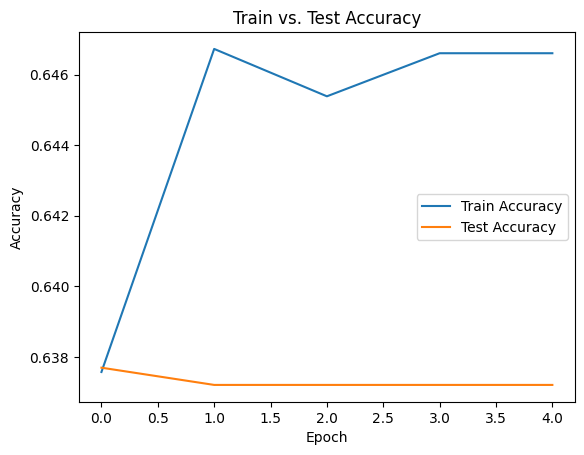

In [ ]:
import matplotlib.pyplot as plt

# Plot the train and test loss
plt.figure()
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Train vs. Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

# Plot the train and test accuracy
plt.figure()
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Train vs. Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **LSTM**

### Creating LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

# Set the number of embedding vector features
embedding_vector_features = 40

# Create a Sequential model
model = Sequential()

# Add an Embedding layer
# The input dimension is set to total_words, and the output dimension is set to embedding_vector_features
# The input_length is set to 20 to match the length of the padded sequences
model.add(Embedding(total_words, embedding_vector_features, input_length=20))

# Add a Dropout layer for regularization
model.add(Dropout(0.3))

# Add a LSTM layer with 500 units and return sequences
model.add(LSTM(500, return_sequences=True))

# Add a Dropout layer for regularization
model.add(Dropout(0.2))

# Add another LSTM layer with 500 units
model.add(LSTM(500))

# Add a Dropout layer for regularization
model.add(Dropout(0.3))

# Add a Dense layer with 1 unit and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Print the model summary
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            479080    
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 20, 500)           1082000   
                                                                 
 dropout_1 (Dropout)         (None, 20, 500)           0         
                                                                 
 lstm_1 (LSTM)               (None, 500)               2002000   
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense (Dense)               (None, 1)                 5

### Training the model

In [ ]:
y_train = np.asarray(train_df['label'])
y_test = np.asarray(test_df['label'])

# Compile the model with the specified optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set the number of epochs
epochs = 5

# Initialize empty lists to store train and test metrics
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

# Iterate over the specified number of epochs
for epoch in range(epochs):
    # Train the model for one epoch
    history = model.fit(padded_train, y_train, epochs=1, verbose=1)
    
    # Get the train loss and accuracy for the current epoch
    train_loss.append(history.history['loss'][0])
    train_accuracy.append(history.history['accuracy'][0])
    
    # Evaluate the model on the test data
    loss, accuracy = model.evaluate(padded_test, y_test)
    test_loss.append(loss)
    test_accuracy.append(accuracy)


40/40 [==============================] - 0s 5ms/step - loss: 0.8198 - accuracy: 0.6433


### Network Architecture

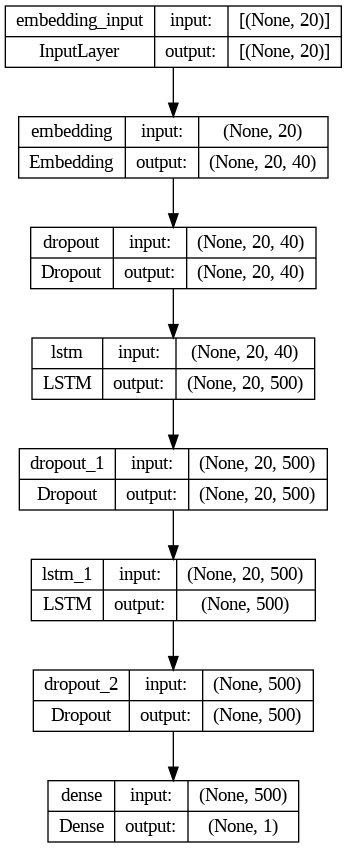

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_lstm.png', show_shapes=True, show_layer_names=True)

### Plotting confusion matrix and accuracy

40/40 [==============================] - 1s 4ms/step
Accuracy:  0.6432517758484609
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       818
           1       0.50      0.41      0.45       449

    accuracy                           0.64      1267
   macro avg       0.60      0.59      0.59      1267
weighted avg       0.63      0.64      0.63      1267



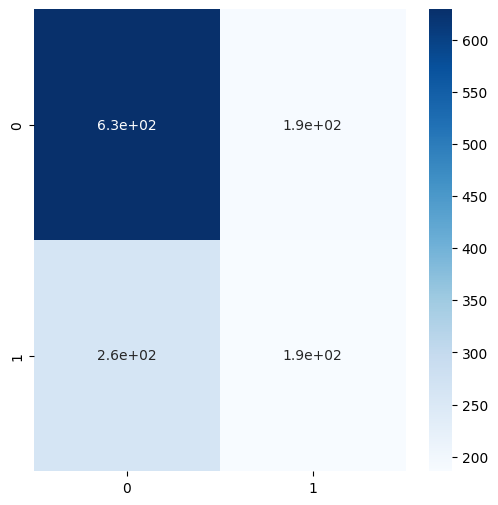

In [ ]:
# Making predictions on the test data
prediction = (model.predict(padded_test) > 0.5).astype("int32")

# Calculating the accuracy
from sklearn.metrics import accuracy_score
y_test = np.asarray(test_df['label'])
accuracy = accuracy_score(list(y_test), prediction)

print("Accuracy: ", accuracy)

# Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, cmap="Blues", linecolor='black', annot=True)

# Generating the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))


### Accuracy

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(list(y_test), prediction)
print("Accuracy: ", accuracy)

Accuracy:  0.6432517758484609


### Plotting train vs test loss and train vs test accuracy

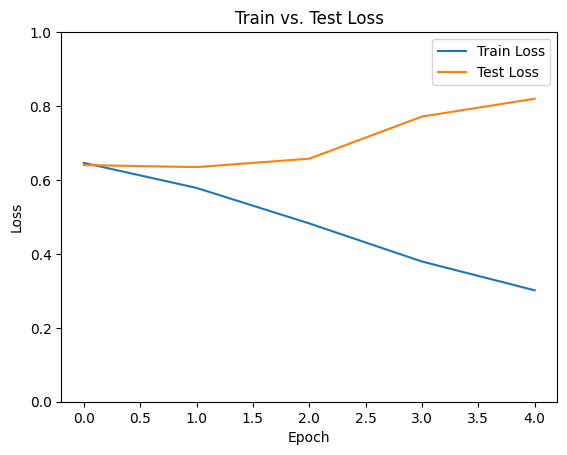

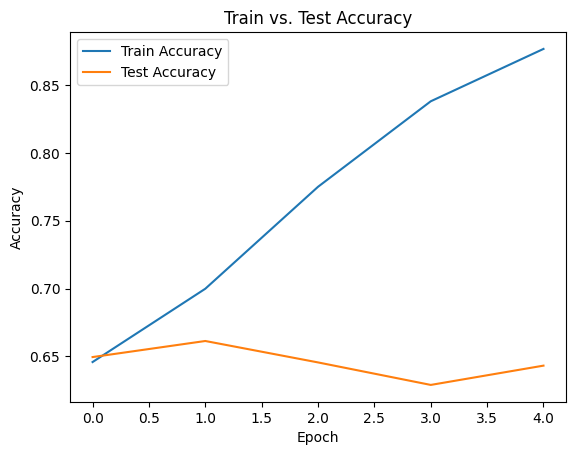

In [ ]:
import matplotlib.pyplot as plt

# Plot the train and test loss
plt.figure()
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Train vs. Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1) 
plt.legend()
plt.show()

# Plot the train and test accuracy
plt.figure()
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Train vs. Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Creating BiLSTM Model

In [ ]:
# Creating the model using Bidirectional LSTM
embedding_vector_features = 40
model = Sequential()

# Embedding layer
model.add(Embedding(total_words, embedding_vector_features, input_length=20))

# Dropout layer
model.add(Dropout(0.3))

# Bidirectional LSTM layer with return_sequences=True to get sequences from both directions
model.add(Bidirectional(LSTM(500, return_sequences=True)))

# Dropout layer
model.add(Dropout(0.2))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(500)))

# Dropout layer
model.add(Dropout(0.3))

# Output dense layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            479080    
                                                                 
 dropout_3 (Dropout)         (None, 20, 40)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 20, 1000)         2164000   
 l)                                                              
                                                                 
 dropout_4 (Dropout)         (None, 20, 1000)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 1000)             6004000   
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 1000)             

### Training the model

In [ ]:
y_train = np.asarray(train_df['label'])
y_test = np.asarray(test_df['label'])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
epochs = 5
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(epochs):
    # Train model for one epoch
    history = model.fit(padded_train, y_train, epochs=1, verbose=1)
    
    # Get train loss and accuracy
    train_loss.append(history.history['loss'][0])
    train_accuracy.append(history.history['accuracy'][0])
    
    # Evaluate model on test data
    loss, accuracy = model.evaluate(padded_test, y_test)
    test_loss.append(loss)
    test_accuracy.append(accuracy)

40/40 [==============================] - 0s 9ms/step - loss: 0.9517 - accuracy: 0.6204


### Network Architecture

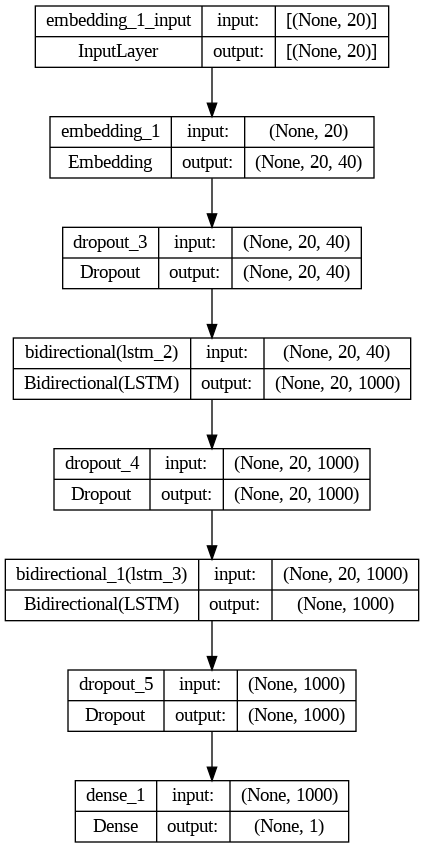

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_bilstm.png', show_shapes=True, show_layer_names=True)

### Plotting confusion matrix and accuracy

40/40 [==============================] - 2s 10ms/step
Accuracy:  0.6203630623520127
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       818
           1       0.46      0.36      0.40       449

    accuracy                           0.62      1267
   macro avg       0.57      0.56      0.56      1267
weighted avg       0.60      0.62      0.61      1267



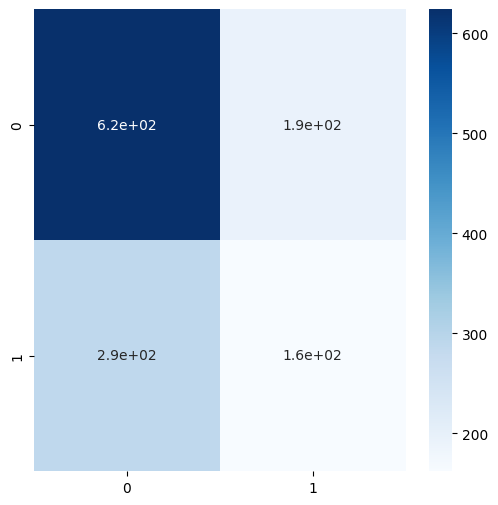

In [ ]:
# Making predictions
prediction = (model.predict(padded_test) > 0.5).astype("int32")

# Getting the accuracy
y_test = np.asarray(test_df['label'])
accuracy = accuracy_score(list(y_test), prediction)
print("Accuracy: ", accuracy)

# Getting the confusion matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, cmap="Blues", linecolor='black', annot=True)

# Printing the classification report
print(classification_report(y_test, prediction))


### Accuracy

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(list(y_test), prediction)
print("Accuracy: ", accuracy)

Accuracy:  0.6203630623520127


### Plotting train vs test loss and train vs test accuracy

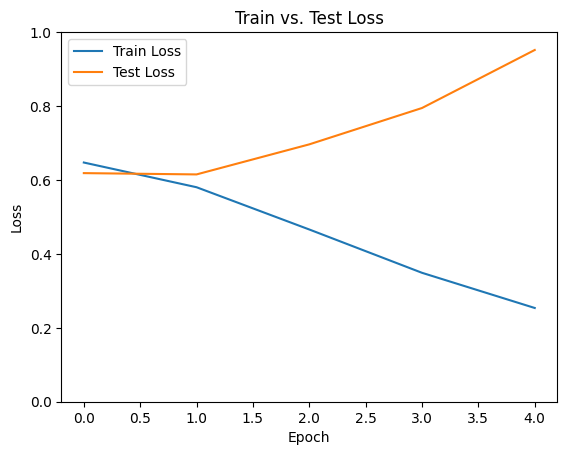

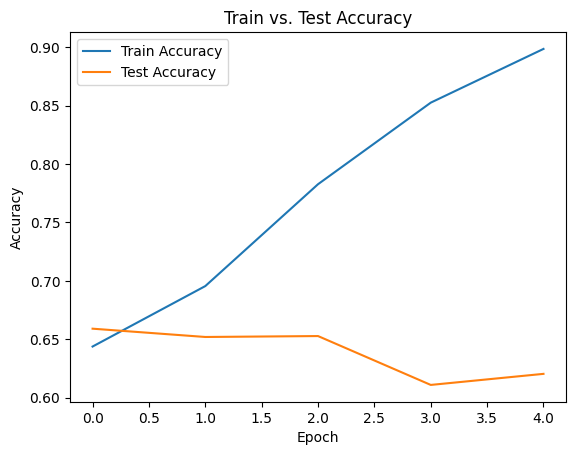

In [ ]:
import matplotlib.pyplot as plt

# Plot the train and test loss
plt.figure()
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Train vs. Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1) 
plt.legend()
plt.show()

# Plot the train and test accuracy
plt.figure()
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Train vs. Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()